In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

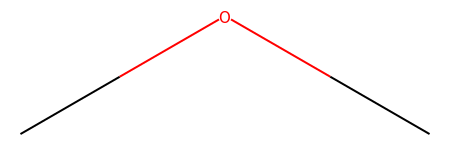

In [4]:
smiles = "COC"
mol = Chem.MolFromSmiles("COC")
mol

Here there are no hydrogens (as expected from the SMILES)

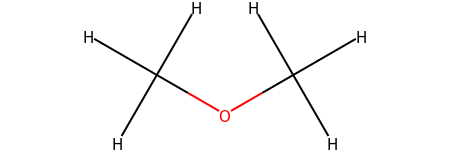

In [5]:
mol = Chem.AddHs(mol)
mol

Here rdkit manages to add Hs to all of the carbons as expected

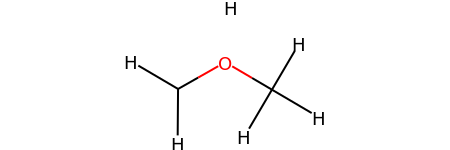

In [6]:
rwmol = Chem.RWMol(mol)
bonds = rwmol.GetBonds()
b = rwmol.GetBondWithIdx(2)
a1 = b.GetBeginAtomIdx()
a2 = b.GetEndAtomIdx()
rwmol.RemoveBond(a1,a2)
rwmol

After fragmentation, both fragments are unsaturated. I would like to quench them with hydrogen.

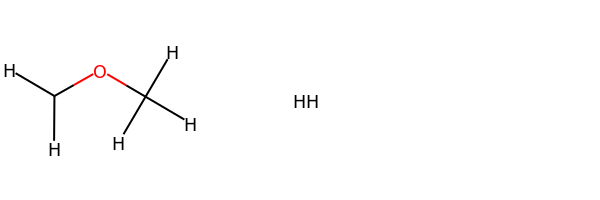

In [7]:
frags = Chem.GetMolFrags(rwmol, asMols=True, sanitizeFrags=True)
MolsToGridImage(frags)

Here only the lone H has been saturated, and not the unsaturated carbon.

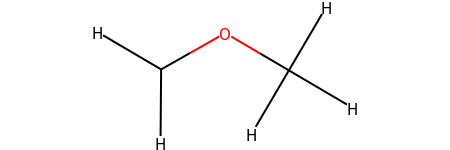

In [9]:
frag = frags[0]
Chem.AddHs(frag)
frag

Explicitly adding H doesn't work either